In [1]:
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
import datetime

In [2]:
plt.rcParams.update({'font.size': 14, "font.family": "Times New Roman"})

In [30]:
t1 = datetime.datetime.fromisoformat("2020-01-22 11:04:35")
t2 = datetime.datetime.fromisoformat("2020-01-24 10:05:35")
t3 = datetime.datetime.fromisoformat("2020-01-24 11:05:35")
(t2 - t1) / (t3 - t1)

0.9791738979521

In [31]:
xticks = [
    datetime.datetime(year=2020, month=1, day=d)
    for d in [9, 21, 25, 29]
] + [
    datetime.datetime(year=2020, month=2, day=1)
]

xticks_str = [
    d.strftime("%Y-%m-%d")
    for d in xticks
]

In [4]:
def read_log(path):
    with open(path, "r") as f:
        lines = f.readlines()

    runtimes = {
        "time": [],
        "runtime": [],
        # "timestep": []
    }

    for i, line in enumerate(lines):
        runtime, time_str = line.split(",")
        runtime = float(runtime)
        time_obj = datetime.datetime.fromisoformat(time_str.strip())

        # for j in range(len(xticks) - 1):
        #     if xticks[j] <= time_obj < xticks[j + 1]:
        #         timestep = j + (time_obj - xticks[j]) / (xticks[j + 1] - xticks[j])
        #         break
        
        runtimes["time"].append(time_obj)
        runtimes["runtime"].append(runtime)
        # runtimes["timestep"].append(timestep)

    return runtimes

In [20]:
log_files = []
labels = {}
colors = {}
markers = {}

for d in [2, 11, 24]:
    for h in [9, 12]:
        log_files.extend([
            f"../logs/ours/citibike_2022-10-{d}-{h}-cache-true.txt",
            f"../logs/ours/citibike_2022-10-{d}-{h}-cache-false.txt",
            # f"../logs/related_works/enclosing1998/citibike_2022-10-{d}-{h}.txt",
            f"../logs/related_works/smallest2019/citibike_2022-10-{d}-{h}.txt",
        ])

        labels.update({
            f"../logs/ours/citibike_2022-10-{d}-{h}-cache-true.txt": "ours (w caching)",
            f"../logs/ours/citibike_2022-10-{d}-{h}-cache-false.txt": "ours (w/o caching)",
            # f"../logs/related_works/enclosing1998/citibike_2022-10-{d}-{h}.txt": "enclosing1998",
            f"../logs/related_works/smallest2019/citibike_2022-10-{d}-{h}.txt": "smallest2019",
        })

        colors.update({
            f"../logs/ours/citibike_2022-10-{d}-{h}-cache-true.txt": "orange",
            f"../logs/ours/citibike_2022-10-{d}-{h}-cache-false.txt": "blue",
            # f"../logs/related_works/enclosing1998/citibike_2022-10-{d}-{h}.txt": "green",
            f"../logs/related_works/smallest2019/citibike_2022-10-{d}-{h}.txt": "red",
        })

        markers.update({
            f"../logs/ours/citibike_2022-10-{d}-{h}-cache-true.txt": "o",
            f"../logs/ours/citibike_2022-10-{d}-{h}-cache-false.txt": "*",
            # f"../logs/related_works/enclosing1998/citibike_2022-10-{d}-{h}.txt": "s",
            f"../logs/related_works/smallest2019/citibike_2022-10-{d}-{h}.txt": "^",
        })

In [32]:
runtimes = {
    path: read_log(path)
    for path in log_files
}

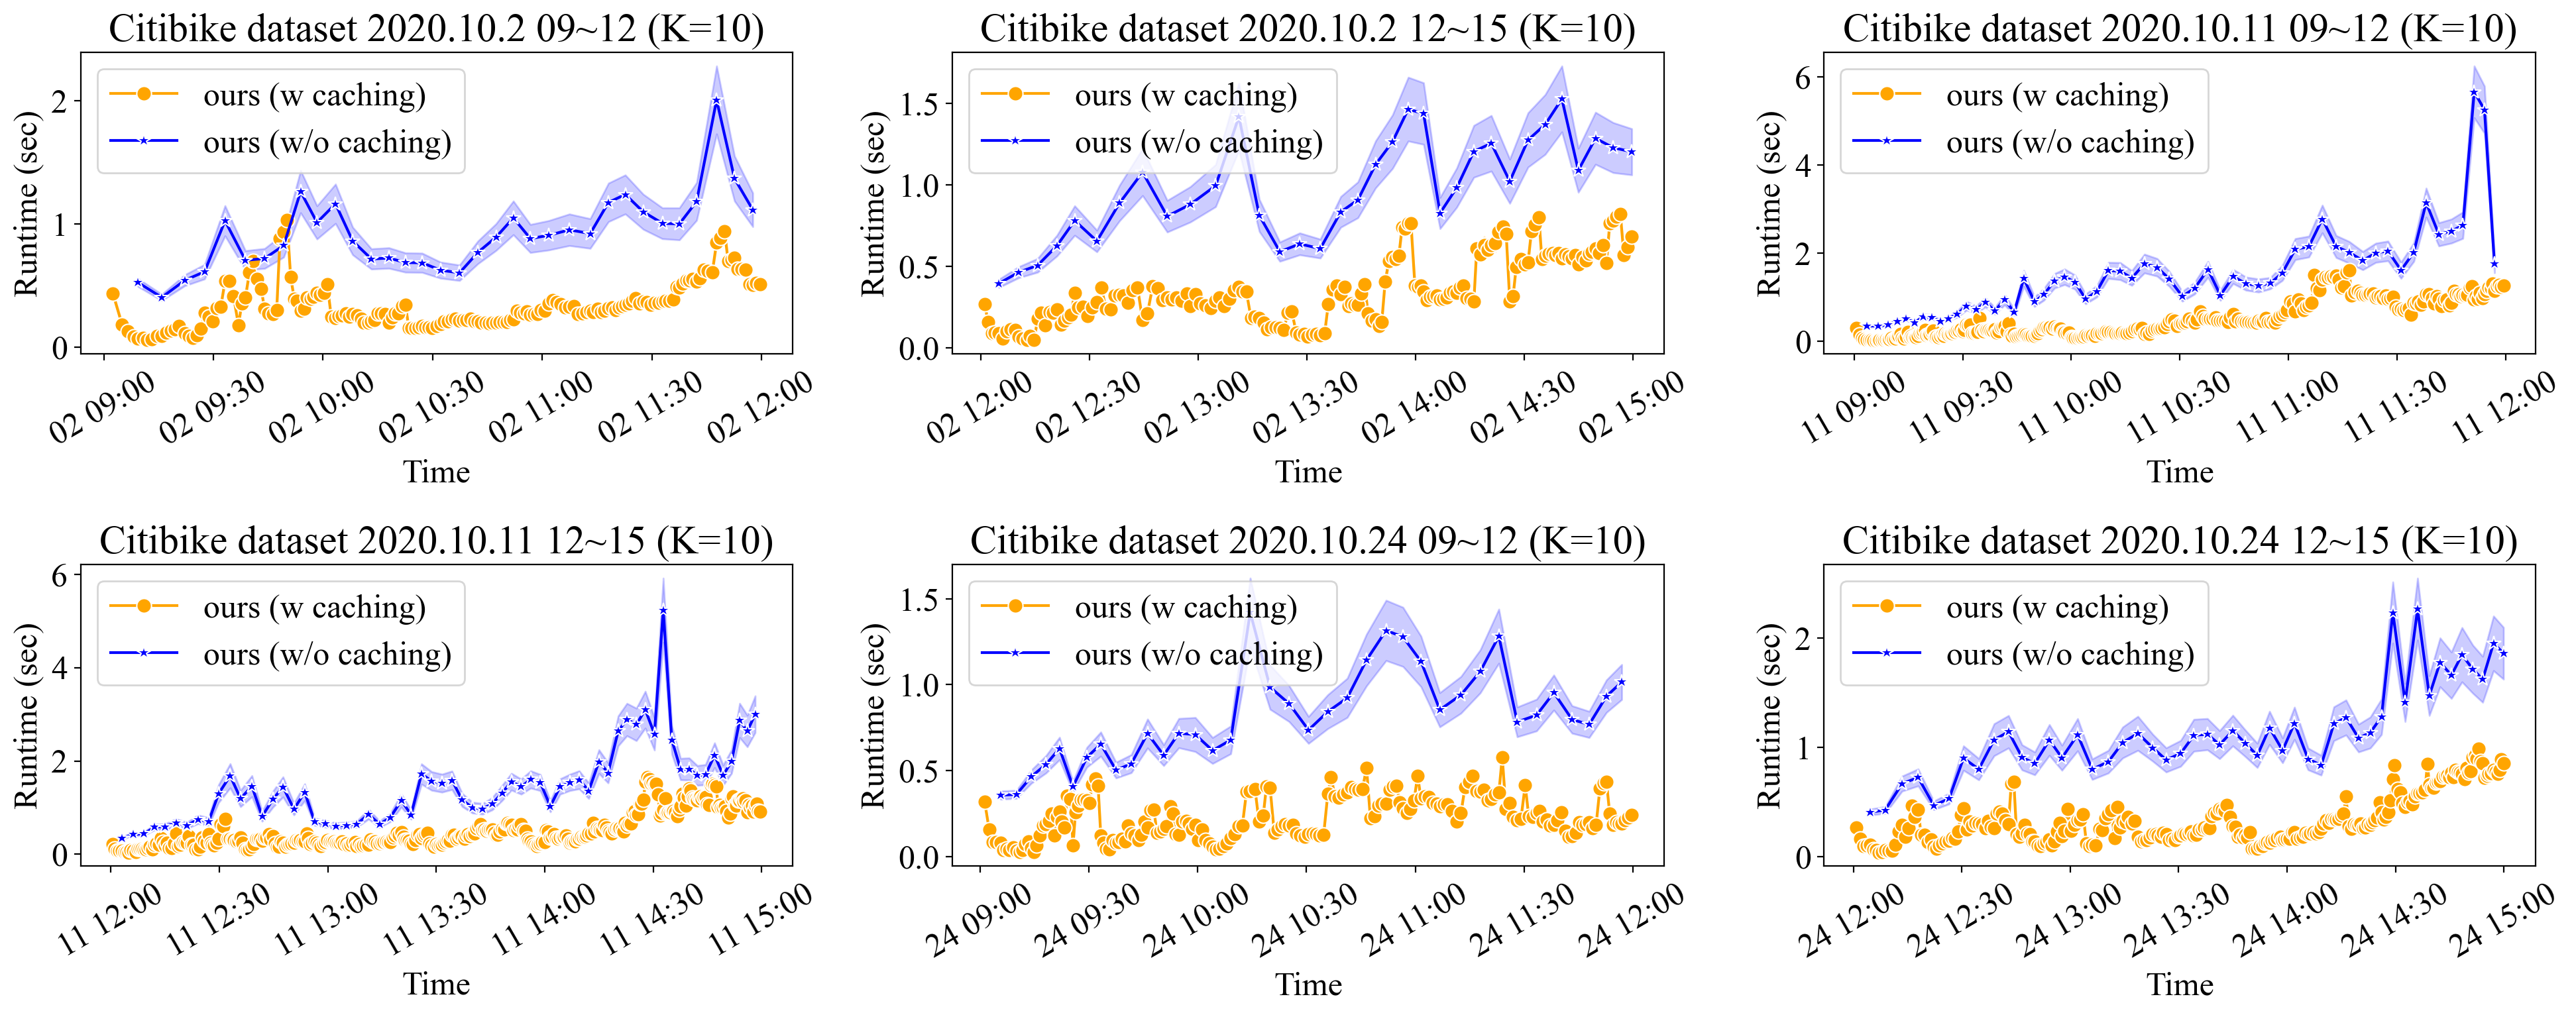

In [33]:


plt.rcParams.update({'font.size': 18, "font.family": "Times New Roman"})
plt.figure(figsize=(20, 8), dpi=200)


for i, d in enumerate([2, 11, 24]):
    for j, h in enumerate([9, 12]):
        plt.subplot(2, 3, i*2 + j+1)
        our_name_w_caching = f"../logs/ours/citibike_2022-10-{d}-{h}-cache-true.txt"
        our_name_wo_caching = f"../logs/ours/citibike_2022-10-{d}-{h}-cache-false.txt"
        # name_enclosing1998 = f"../logs/related_works/enclosing1998/citibike_2022-10-{d}-{h}.txt"
        # name_smallest2019 = f"../logs/related_works/smallest2019/citibike_2022-10-{d}-{h}.txt"

        sns.lineplot(data=runtimes[our_name_w_caching], x="time", y="runtime", estimator=np.mean, errorbar="sd", label=labels[our_name_w_caching], marker=markers[our_name_w_caching], ms=8, linestyle="-", color=colors[our_name_w_caching])
        sns.lineplot(data=runtimes[our_name_wo_caching], x="time", y="runtime", estimator=np.mean, errorbar="sd", label=labels[our_name_wo_caching], marker=markers[our_name_wo_caching], ms=8, linestyle="-", color=colors[our_name_wo_caching])
        # sns.lineplot(data=runtimes[name_enclosing1998], x="time", y="runtime", label=labels[name_enclosing1998], marker=markers[name_enclosing1998], ms=8, linestyle="-", color=colors[name_enclosing1998])
        # sns.lineplot(data=runtimes[name_smallest2019], x="time", y="runtime", label=labels[name_smallest2019], marker=markers[name_smallest2019], ms=8, linestyle="-", color=colors[name_smallest2019])

        plt.legend()
        plt.xlabel("Time")

        plt.xticks(None, None, rotation=30)
        plt.ylabel("Runtime (sec)")
        plt.title(f"Citibike dataset 2020.10.{d} {h:02d}~{h+3:02d} (K=10)")

plt.tight_layout()
plt.savefig("runtime_citibike.png")
plt.show()